In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Load data

1. Load provided `Iris.csv` file.
2. Change the Species columns to numeric label `0, 1, 2` and output a numpy.ndarray in shape `(num_data, 1)`. 
3. Convert `SepalLengthCm`, `SepalWidthCm` column into numpy.ndarray in shape `(num_data, 2)`.

1.1 Load provided `Iris.csv` file. Show the first 10 lines (1 points.)

In [2]:
########################
# Write your code here #
data = pd.read_csv("C:/Users\Quan\GitHub\CUHKSZ-DDA3020\Assignment 01/raw_data/Iris.csv")
data.head(10)
########################

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


1.2 Change the Species columns to numeric label `0, 1, 2` and output a numpy.ndarray in shape `(num_data, 1)`. Show data every 10 lines. (2 points)

In [3]:
########################
# Write your code here #
data["Species"] = data["Species"].apply(lambda x: 0 if x == "Iris-setosa" else 1 if x == "Iris-versicolor" else 2)
species_array = data["Species"].to_numpy()
species_array = species_array.reshape(-1,1)
species_array[::10]
########################

array([[0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2]])

1.3 Convert `SepalLengthCm` and `SepalWidthCm` columns to ndarray in shape `[num_data, 2]`. Convert numeric label column to ndarray in shape `[num_data, 1]`. Print these two ndarray (1 point).

In [4]:
########################
# Write your code here #
ndarray = data[["SepalLengthCm", "SepalWidthCm"]].to_numpy()
ndarray.reshape(-1,2)
print(ndarray)

print(species_array)
########################

[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.1]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

## 2. Softmax, Cost, and Derivative Functions

2.1 Develop softmax function and try to output softmax function output of this example (3 points). Softmax function 
$$\hat{y}_c = \frac{\exp\left(z_c\right)}{\sum_{j=1}^C \exp\left(z_j\right)}\text{, where } c \text{ is class index and } C \text{ is the number of classes.}$$

In [5]:
def softmax(z):
    """
    Calculating softmax function.
    Args:
        z: (numpy.ndarray in shape [num_data, num_classes]) logit
    Returns:
        pred: (numpy.ndarray in shape [num_data, num_classes]) predict value
    """
    ########################
    # Write your code here #
    exp_zc = np.exp(z)
    pred = exp_zc / np.sum(exp_zc, axis=1, keepdims=True)
    ########################
    
    return pred
    
test_z = np.array([[1, 1, 1],
                   [1, 3, 5],
                   [-1, 0, 1]])

softmax(test_z)

array([[0.33333333, 0.33333333, 0.33333333],
       [0.01587624, 0.11731043, 0.86681333],
       [0.09003057, 0.24472847, 0.66524096]])

2.2 Develop cost function of multi-class logistic regression and try to output cost function output of this example (3 points). Cost function $$\mathcal{L}=-\frac{1}{N}\sum_{i=1}^N\sum_{c=1}^C y_{ic}\log\left(\hat{y}_{ic}\right) \text{, where } N \text{ is the number of data}$$ 

(Hint: convert label ndarray to the same shape of predicted ndarray, e.g.
$$
\begin{bmatrix} 0 \\ 1 \\ 2 \\ 1 \\ 0 \end{bmatrix} \Rightarrow \begin{bmatrix} 1 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 1 \\ 0 & 1 & 0 \\ 1 & 0 & 0 \end{bmatrix}
$$

In [6]:
def cost_function(pred, label):
    """
    Calculating cost function.
    Args:
        pred: (numpy.ndarray in shape [num_data, num_classes]) predict value after softmax
    Returns:
        loss: (numpy.ndarray)
    """
    ########################
    # Write your code here #
    data_num = label.shape[0]
    type_num = np.max(label) + 1
    label = label.transpose()
    label_one_hot = np.eye(type_num)[label]

    loss = -np.sum(label_one_hot * np.log(pred)) / data_num
    ########################
    return loss
    
test_pred = np.array([[0.1, 0.2, 0.7],
                      [0.2, 0.6, 0.2],
                      [0.2, 0.1, 0.7]])
test_label = np.array([[2], [1], [0]])
cost_function(test_pred, test_label)

np.float64(0.8256461600462744)

2.3 Develop gradient calculation of multi-class logistic regression and try to output gradient of given example. You're required to derive the derivatives $\frac{\partial\mathcal{L}}{\partial\mathbf{w}}$ by yourself and write it in your writing problems. Assume all $x_0=1$, predicted values should be $\hat{y}_i=\text{Softmax}\left(\mathbf{x}^T_i \mathbf{w}\right)$ (3 points for coding, 3 points for mathematical derivation).

In [10]:
def get_gradient(X, y, y_pred):
    """
    Calculate gradient for gradient descent.
    Args:
        X: (numpy.ndarray in shape [num_data, 3])
        y: (numpy.ndarray in shape [num_data, 1])
        y_pred: (numpy.ndarray in shape [num_data, num_classes])
    Return:
        gradient: (numpy.ndarray in [3, 3]) gradient of w
    """
    ########################
    # Write your code here #
    N = X.shape[0]
    C = y_pred.shape[1]  # number of classes

    y_one_hot = np.zeros_like(y_pred)
    for i in range(N):
        y_one_hot[i, y[i]] = 1

    gradient = np.dot(X.T, (y_pred - y_one_hot)) / N

    ########################
    return gradient

test_X = np.array([[1, 1, 2],
                   [1, 2, 3],
                   [1, 3, 4],
                   [1, 4, 5]])
test_y = np.array([[0], [1], [1], [2]])
test_y_pred = np.array([[0.1, 0.2, 0.7],
                        [0.2, 0.4, 0.4],
                        [0.2, 0.3, 0.5],
                        [0.3, 0.4, 0.3]])
get_gradient(test_X, test_y, test_y_pred)

array([[-0.05 , -0.175,  0.225],
       [ 0.325, -0.375,  0.05 ],
       [ 0.275, -0.55 ,  0.275]])

## 3. Gradient Descent

3.1 Convert data according to assumption of $x_0=1$. (1 point)

In [8]:
########################
# Write your code here #
########################

3.2 Initialize value of $\mathbf{w}$ and start up gradient descent. Record cost function value iteration by iteration. (3 points)

In [9]:
def gradient_descent(X, y, lr, epoch):
    np.random.seed(42) # set random seed to control initialized value
    w = np.random.rand(3, 3)
    
    ########################
    # Write your code here #
    ########################
        
    return w
    
epoch = 10000
lr = 0.1
cost_record = []
w = gradient_descent(X, y, lr, epoch)

NameError: name 'X' is not defined

3.3 Plot cost function v.s. epoch curve. (1 point)

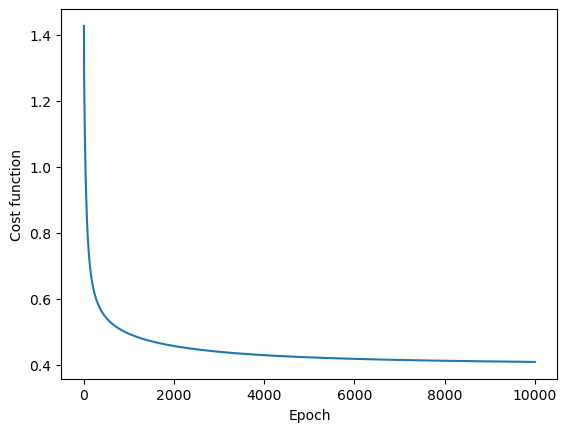

In [10]:
########################
# Write your code here #
########################

## 4. Plot result

4.1 Plot scatters using ground-truth label. (2 points)

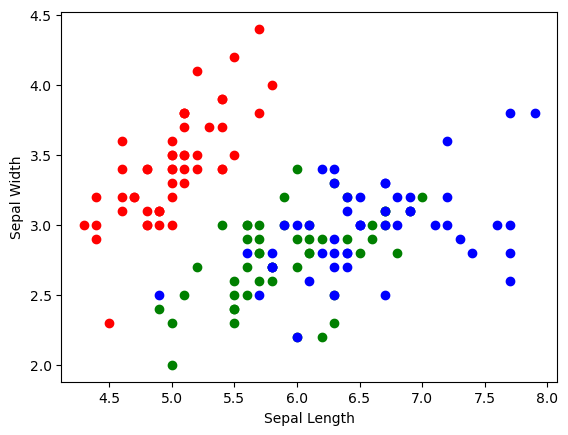

In [11]:
########################
# Write your code here #
########################

4.1 Plot scatters using predicted label. (2 points)

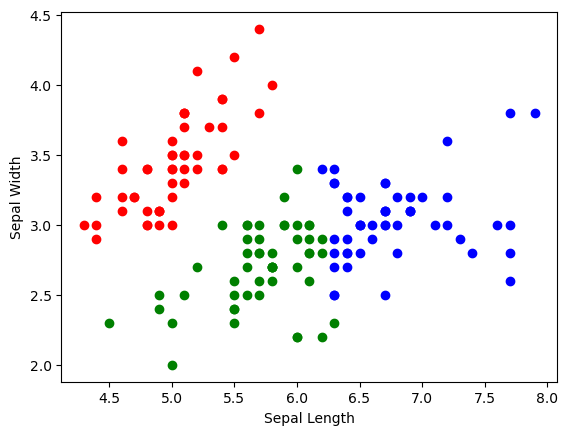

In [12]:
########################
# Write your code here #
########################